In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import dynamic_inverse_kinematics_objectives, draw_dynamic_solutions
from idea import dynamic_IDEA

In [20]:
rectangles = [((0.4, 2.), (5., 4.)), ((-5., 2.), (-0.8, 4.)), ((-0.5, 2.), (0.1, 4.)),
              ((-5., 5.), (-0.3, 6.)), ((-0.1, 5.), (5., 6.))]
rectangle_vs = [(0., 0.)] * len(rectangles)
target = (1., 8.)
target_v = (-0.25, 0.)
S = [0.7] * 10 + [0.3] * 10
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 9

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
n_inf = int(0.8*n)
n_immigrants = 200
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.05
num_iterations_init = 200
num_iterations = 40

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 305, best: [36.34424611], #infeasible: 295, best: [12.66497585  1.        ]
Iteration 20, #feasible: 120, best: [16.43128059], #infeasible: 480, best: [0.04336739 1.        ]
Iteration 40, #feasible: 120, best: [0.26912226], #infeasible: 480, best: [1.6477498e-05 1.0000000e+00]
Iteration 60, #feasible: 120, best: [0.00011041], #infeasible: 480, best: [1.43300761e-06 1.00000000e+00]
Iteration 80, #feasible: 120, best: [7.73411502e-08], #infeasible: 480, best: [1.3374779e-09 1.0000000e+00]
Iteration 100, #feasible: 120, best: [1.42191273e-10], #infeasible: 480, best: [5.65754725e-11 1.00000000e+00]
Iteration 120, #feasible: 120, best: [5.36016306e-13], #infeasible: 480, best: [1.00447783e-14 1.00000000e+00]
Iteration 140, #feasible: 120, best: [4.59159782e-16], #infeasible: 480, best: [1.18826539e-15 1.00000000e+00]
Iteration 160, #feasible: 120, best: [8.1212247e-18], #infeasible: 480, best: [9.37416682e-16 1.00000000e+00]
Iteration 180, #feasible: 120, best:

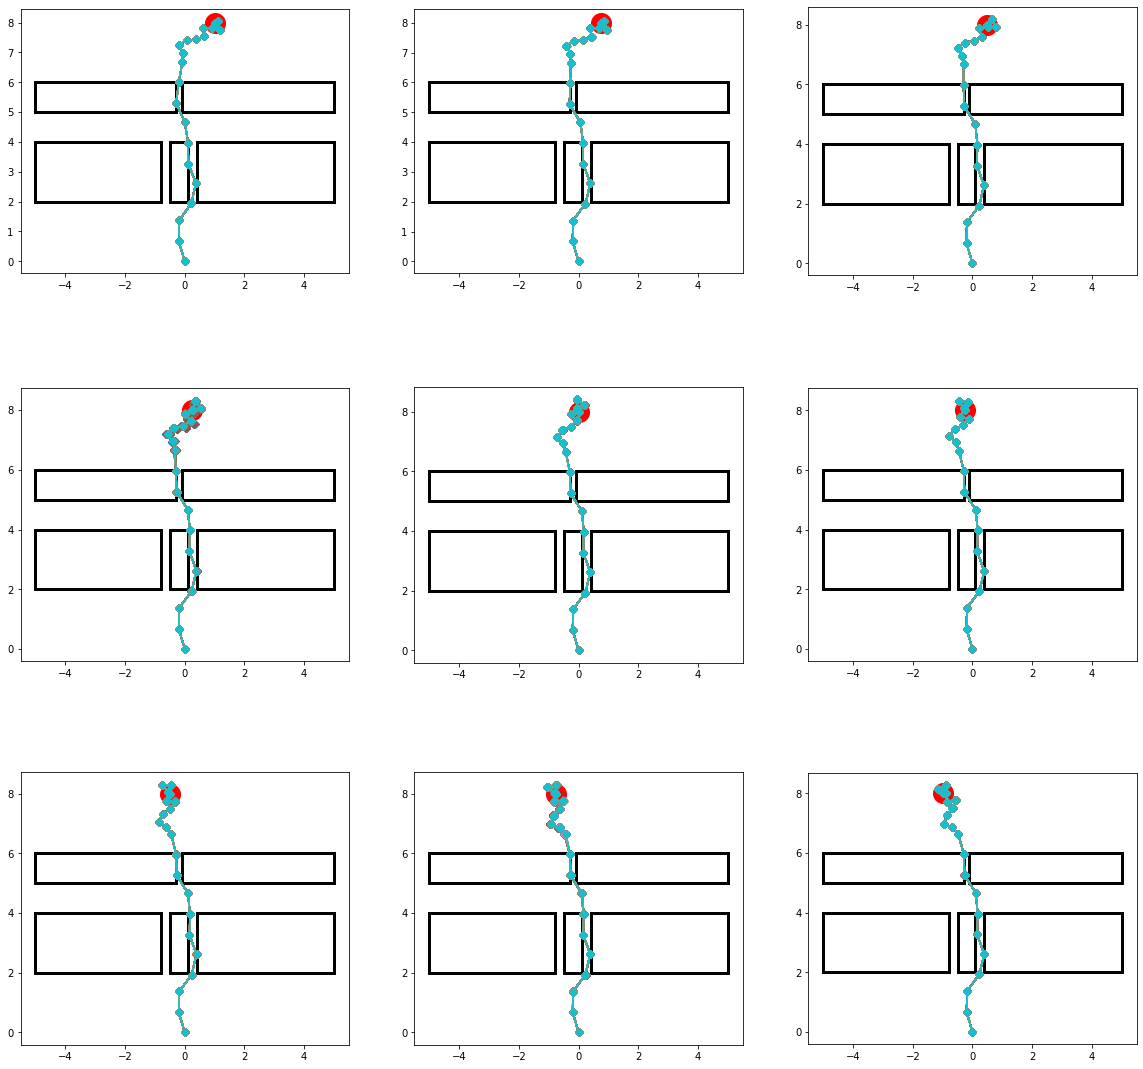

In [21]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20))

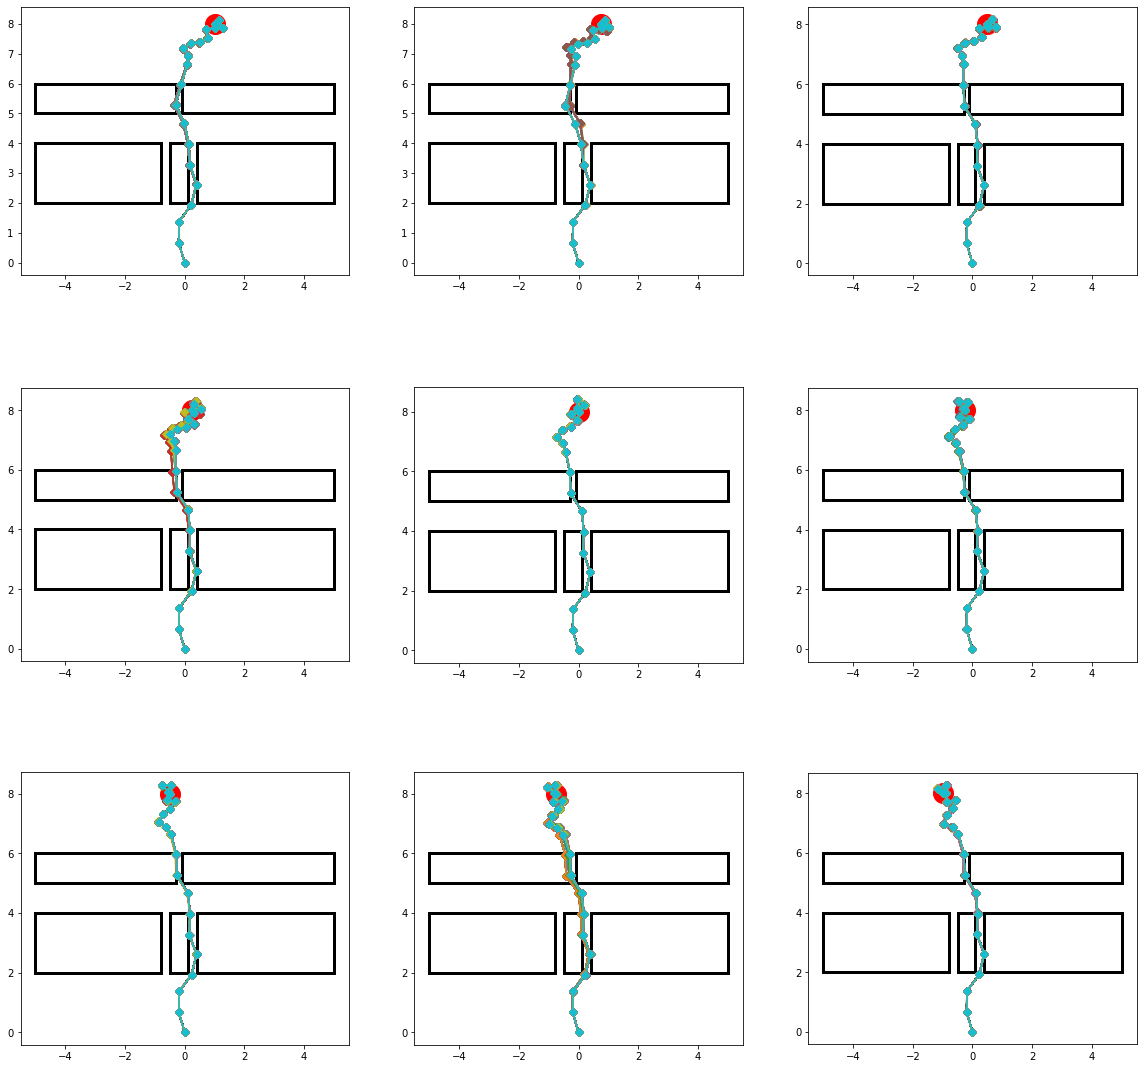

In [22]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=3, ncols=3, figsize=(20, 20))

In [26]:
rectangles = [((1.6, 2.), (7., 3.)), ((-7., 2.), (-0.4, 3.)), ((0.1, 2.), (1.1, 3.)),
              ((-7., 4.5), (-1.3, 6.)), ((-0.8, 5.), (7., 6.5))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
target = (1., 8.)
target_v = (0., 0.)
S = [0.8] * 20
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
n_inf = int(0.8*n)
n_immigrants = 200
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.1
num_iterations_init = 200
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 120, best: [23.15922572], #infeasible: 480, best: [1.95941865 2.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 120, best: [1.99944481], #infeasible: 480, best: [0.00951851 1.        ]
Iteration 40, #feasible: 120, best: [0.10739129], #infeasible: 480, best: [8.20546112e-05 1.00000000e+00]
Iteration 60, #feasible: 120, best: [0.0002884], #infeasible: 480, best: [1.22106128e-05 1.00000000e+00]
Iteration 80, #feasible: 120, best: [6.7641197e-06], #infeasible: 480, best: [4.865868e-08 1.000000e+00]
Iteration 100, #feasible: 120, best: [7.88117238e-08], #infeasible: 480, best: [4.23774737e-12 1.00000000e+00]
Iteration 120, #feasible: 120, best: [5.85255339e-11], #infeasible: 480, best: [4.23774733e-12 1.00000000e+00]
Iteration 140, #feasible: 120, best: [1.54414915e-14], #infeasible: 480, best: [4.23774732e-12 1.00000000e+00]
Iteration 160, #feasible: 120, best: [3.31958108e-15], #infeasible: 480, best: [4.23774732e-12 1.00000000e+00]
Iteration 180, #feasible: 120, best: [4.82393886e-16], #infeasible: 480, best: [4.2377473e-12 1.0000000e+00]
Iteration 199, #feasible: 120, be

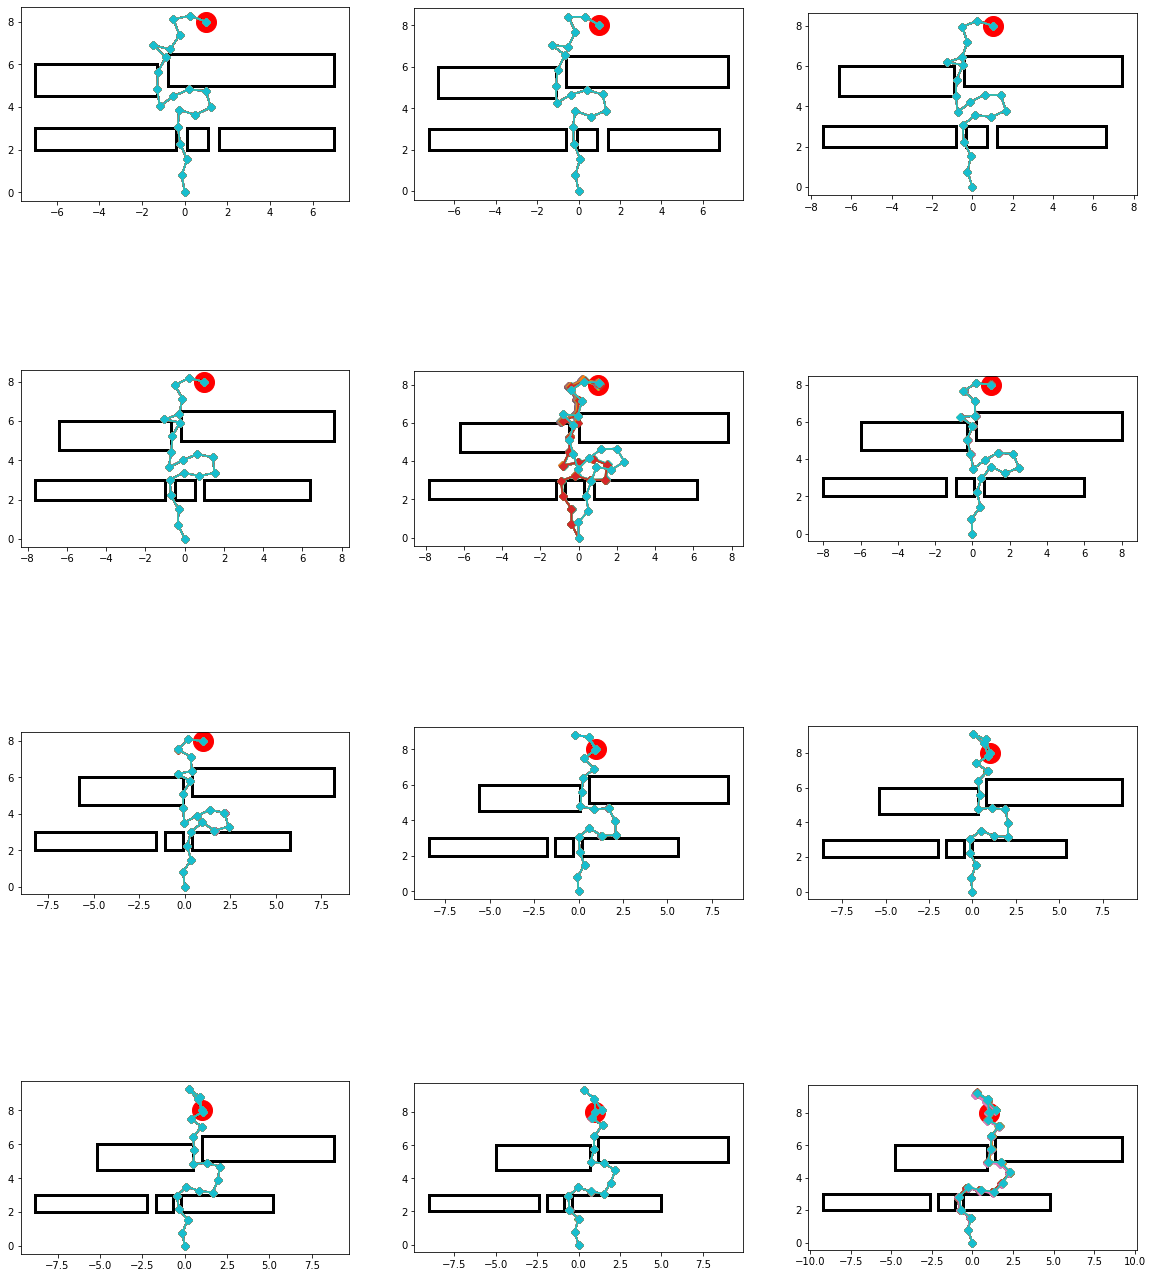

In [27]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25))

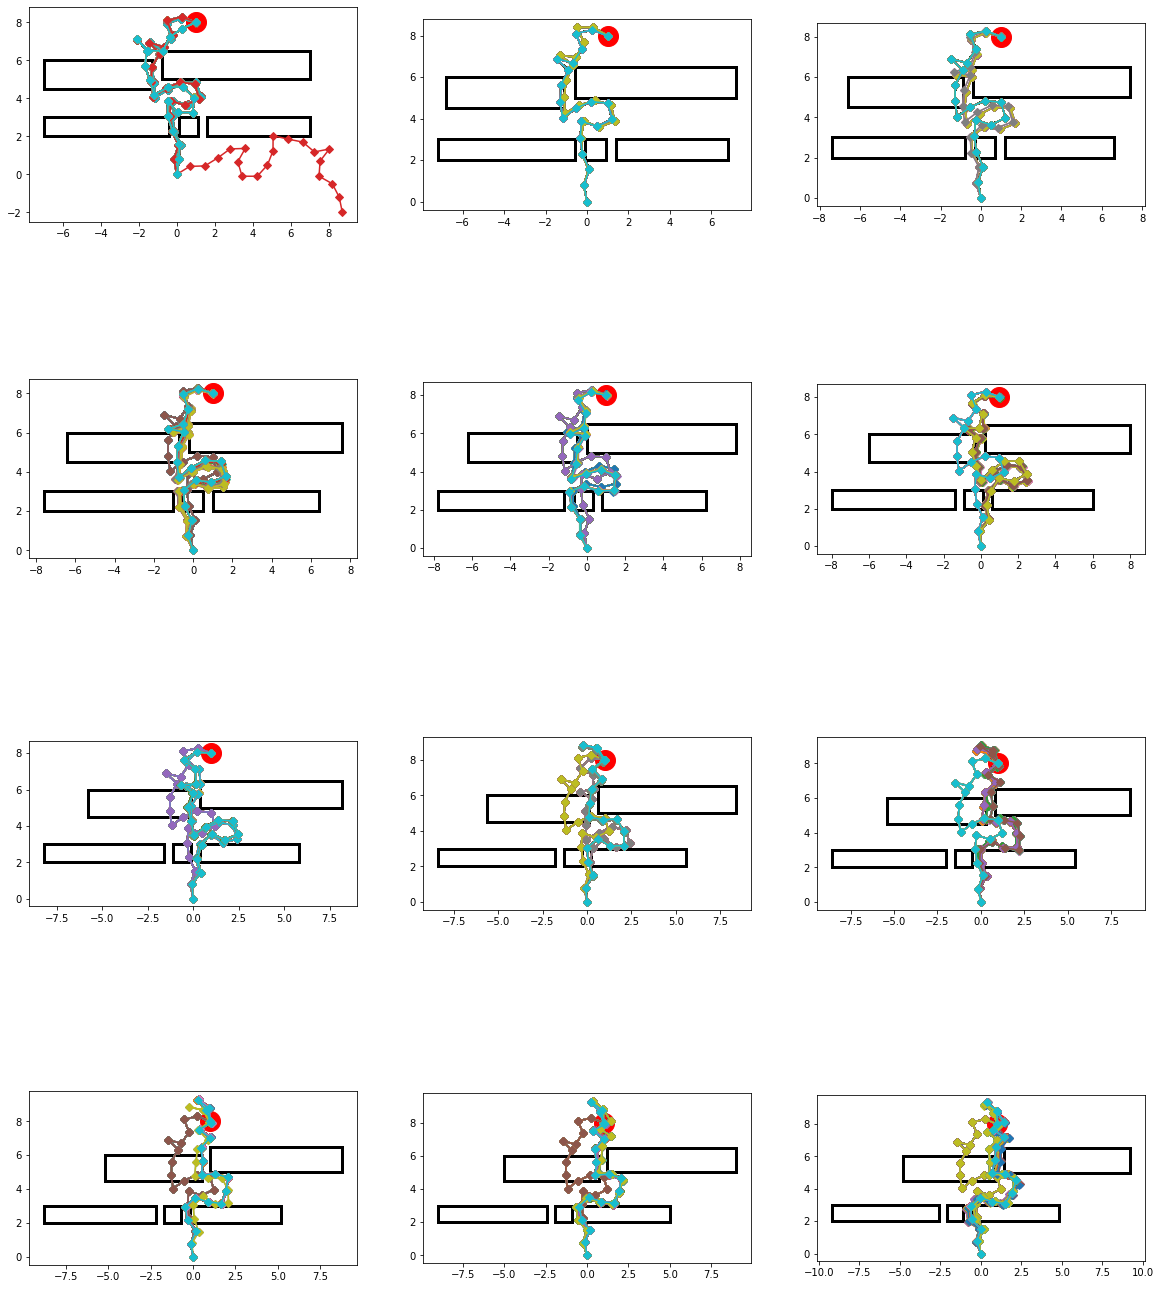

In [28]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25))

In [30]:
rectangles = [((1.6, 2.), (7., 3.)), ((-7., 2.), (-0.4, 3.)), ((0.1, 2.), (1.1, 3.)),
              ((-7., 4.5), (-1.3, 6.)), ((-0.8, 5.), (7., 6.5))]
rectangle_vs = [(-0.2, 0.)] * 3 + [(0.2, 0.)] * 2
target = (3., 8.)
target_v = (-0.5, 0.)
S = [0.8] * 20
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 12

objective = dynamic_inverse_kinematics_objectives(S, target, target_v, rectangles, rectangle_vs)
n_constraints = len(rectangles)

n = 600
n_inf = int(0.8*n)
n_immigrants = 200
eta_c = 3.
eta_m = 20.
p_c = 0.9
p_m = 0.1
num_iterations_init = 200
num_iterations = 120

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, n_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=20)

t=0
Iteration 0, #feasible: 120, best: [26.884253], #infeasible: 480, best: [0.44931913 1.        ]


/home/i291318/Dynamic-inverse-kinematics/simulation.py:23: RuntimeWarning: divide by zero encountered in true_divide
  t = vector_product(x2 - x1, d2) / rs
/home/i291318/Dynamic-inverse-kinematics/simulation.py:24: RuntimeWarning: divide by zero encountered in true_divide
  u = vector_product(x2 - x1, d1) / rs


Iteration 20, #feasible: 120, best: [9.90698802], #infeasible: 480, best: [0.00460033 1.        ]
Iteration 40, #feasible: 120, best: [5.60287968], #infeasible: 480, best: [0.00120183 1.        ]
Iteration 60, #feasible: 120, best: [3.22430572], #infeasible: 480, best: [8.69461785e-05 1.00000000e+00]
Iteration 80, #feasible: 120, best: [1.89683303], #infeasible: 480, best: [8.69461785e-05 1.00000000e+00]
Iteration 100, #feasible: 120, best: [1.32570333], #infeasible: 480, best: [1.23612802e-06 1.00000000e+00]
Iteration 120, #feasible: 120, best: [0.00238406], #infeasible: 480, best: [3.78278626e-08 1.00000000e+00]
Iteration 140, #feasible: 120, best: [0.0002649], #infeasible: 480, best: [1.21268802e-10 1.00000000e+00]
Iteration 160, #feasible: 120, best: [2.21721862e-05], #infeasible: 480, best: [2.50723774e-13 1.00000000e+00]
Iteration 180, #feasible: 120, best: [1.71241447e-06], #infeasible: 480, best: [6.47046081e-14 1.00000000e+00]
Iteration 199, #feasible: 120, best: [3.71769057e-

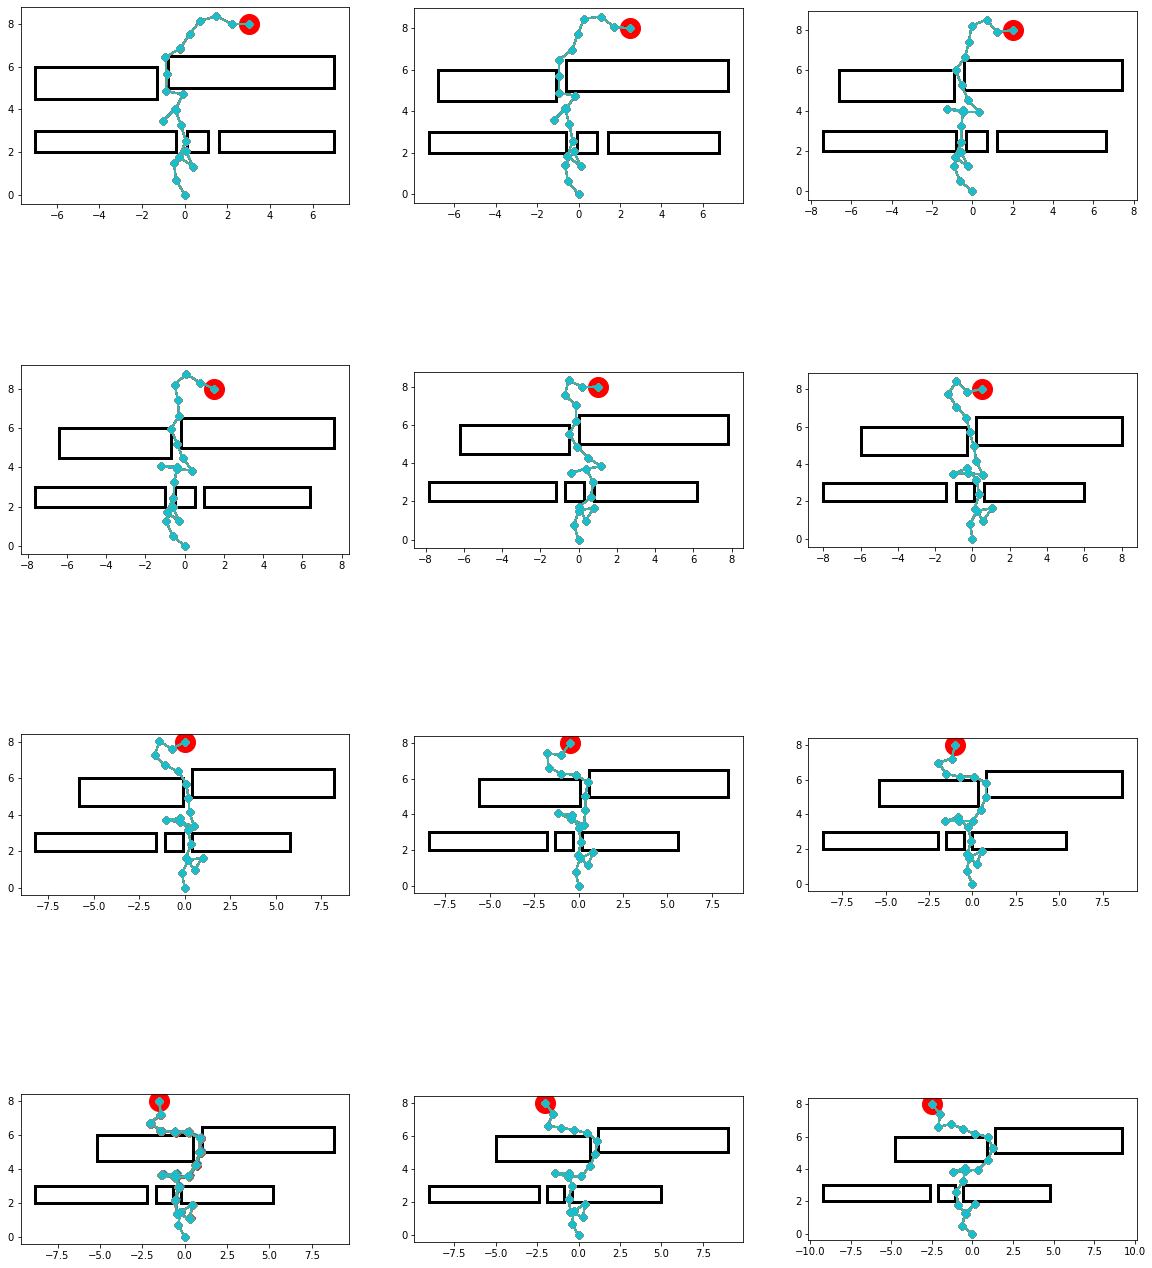

In [31]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    feasible_populations.append(feasible_population)
    
draw_dynamic_solutions(feasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25))

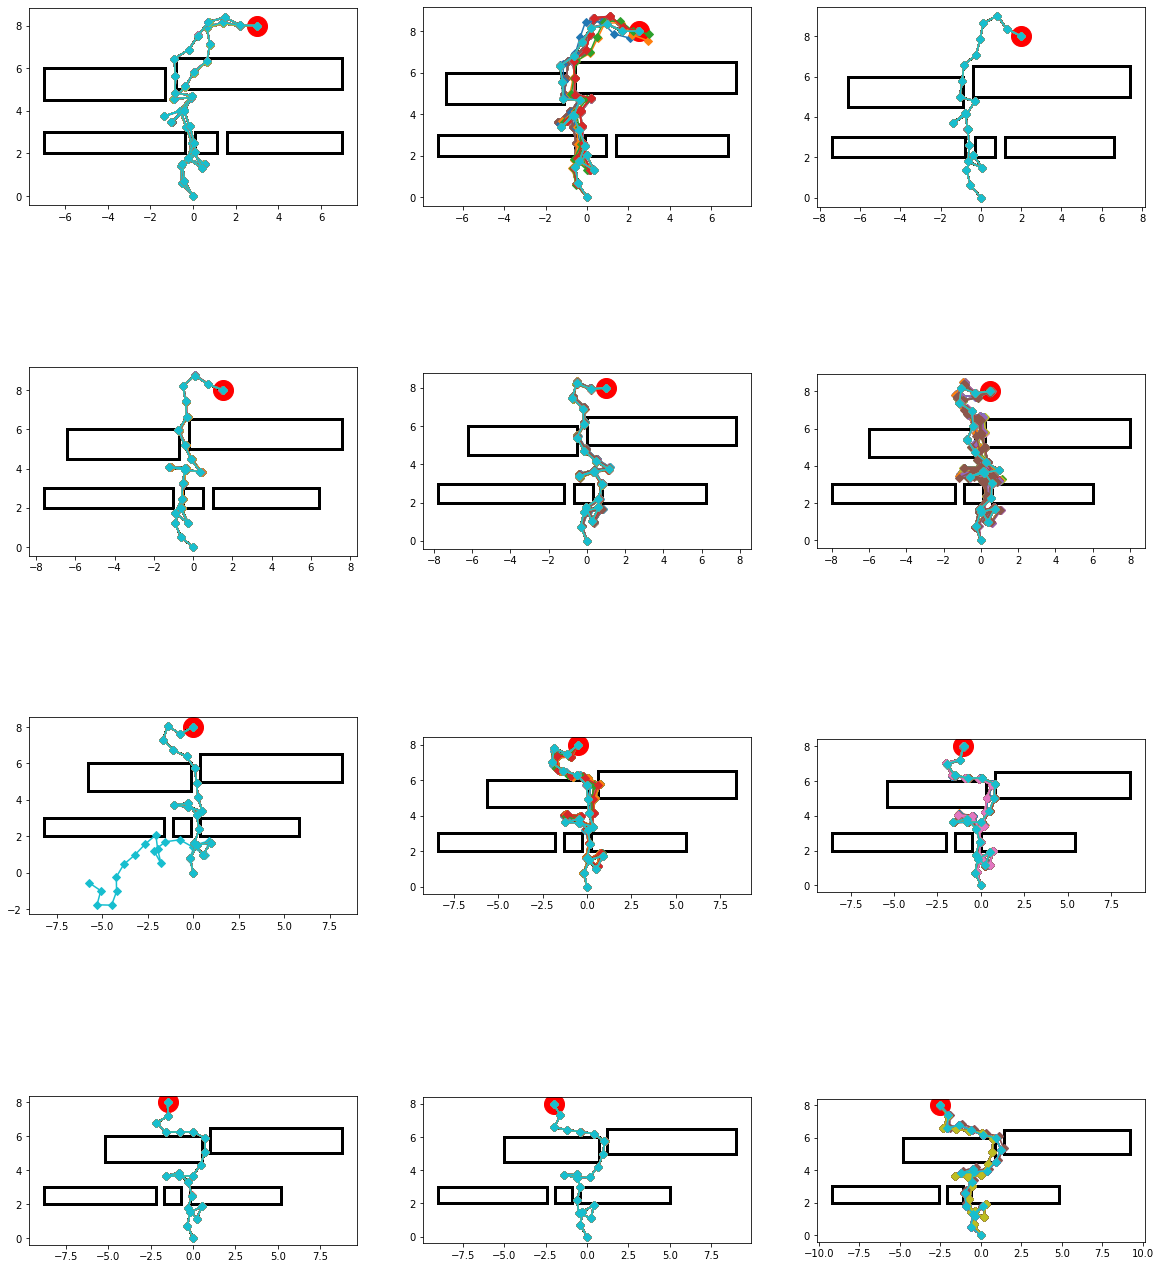

In [32]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population)
    
draw_dynamic_solutions(infeasible_populations, S, target, target_v, rectangles, rectangle_vs, np.arange(T), 
                       nrows=4, ncols=3, figsize=(20, 25))